# 第十五讲 数组的扩维翻转滚动旋转行列交换

## 数组的维数(ndim)与数组的扩维np.expand_dims(a,axis=0或1)

In [1]:
import numpy as np;
a=np.arange(10,15); 
print(a)
print(a.ndim)   #数组维数可以调用方法ndim取得

[10 11 12 13 14]
1


In [2]:
b=np.expand_dims(a,axis=0);# 等价地        b=np.mat(a)
print(b);
print(b.ndim) #行向扩维（ 多列包装成一行）


[[10 11 12 13 14]]
2


In [3]:
c=np.expand_dims(a,axis=1);
print(c);
print(c.ndim)# 列向扩维（多列包装成单列多行)

[[10]
 [11]
 [12]
 [13]
 [14]]
2


In [4]:
a[2],b[0][2],b[0,2],c[2][0],c[2,0]  #体会a 是一维数组，b和c是二维数组。

(12, 12, 12, 12, 12)

a只有axis=0轴，看起来是一行，但更像数学上的列向量。b和c既有axis=0轴又有axis=1 轴。c 也扮演数学列向量。我们可以用dot运算来体会。

## 数组左右翻转fliplr,上下翻转flipud,上下左右翻转flip

In [5]:
import numpy  as np;
a=np.arange(10,15); 
b=np.arange(16).reshape(4,4);
print(b)
c=np.fliplr(b)
ah=np.expand_dims(a,axis=1); 
d=np.flipud(ah);
print('左右翻转\nc=',c); 
print('上下翻转\nd=',d); 
print('上下左右翻转\nflip(b)=',np.flip(b))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
左右翻转
c= [[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]
 [15 14 13 12]]
上下翻转
d= [[14]
 [13]
 [12]
 [11]
 [10]]
上下左右翻转
flip(b)= [[15 14 13 12]
 [11 10  9  8]
 [ 7  6  5  4]
 [ 3  2  1  0]]


## 数组翻转用于图形翻转

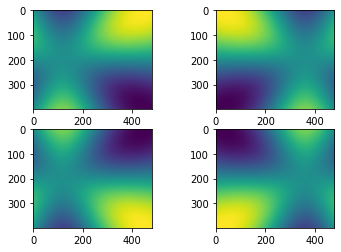

In [6]:
import numpy as np;
from matplotlib import pyplot as plt
pt,pw=plt.subplot,plt.imshow
x,y=np.ogrid[-10:10:400j,-6:18:480j];
r=np.sqrt(x**2+y**2);
z=0.7*x*(x**2-3*y**2)*np.exp(-0.16*r);
zlr=np.fliplr(z);zud=np.flipud(z);zlrud=np.flip(z)
tu=z,zlr,zud,zlrud
for i in range(4):pt(2,2,i+1);pw(tu[i])
plt.show()

## 数组翻转用于照片的可视化效果

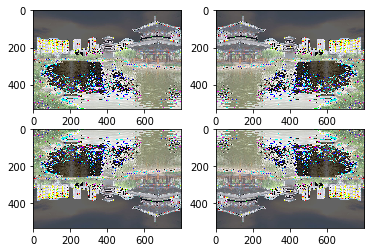

In [1]:
from matplotlib import pyplot as plt;
ar=plt.np
a=plt.imread('snut.jpg')
a=a+100
alr=ar.fliplr(a);
aud=ar.flipud(a);
aall=ar.flip(a,axis=(0,1));#对于照片axis=2不能翻转
tu=a,alr,aud,aall
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1);
    plt.imshow(tu[i])
plt.show()


# 数组行滚动np.roll(a,n,axis=0)与列滚列np.roll(a,n,axis=1)

In [8]:
import numpy as np;
a=np.arange(16).reshape(4,4).astype(np.int8);
print(a)
av=np.roll(a,2,axis=0);
print('沿着行索引增加的方向滚动两行\n',av)
ah=np.roll(a,2,axis=1);
print('沿着列索引增加的方向滚动两列\n',ah)
ar=np.roll(a,(1,2),axis=(0,1))#纵向滚动一行横向滚动2列

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
沿着行索引增加的方向滚动两行
 [[ 8  9 10 11]
 [12 13 14 15]
 [ 0  1  2  3]
 [ 4  5  6  7]]
沿着列索引增加的方向滚动两列
 [[ 2  3  0  1]
 [ 6  7  4  5]
 [10 11  8  9]
 [14 15 12 13]]


## 数组滚动的可视化


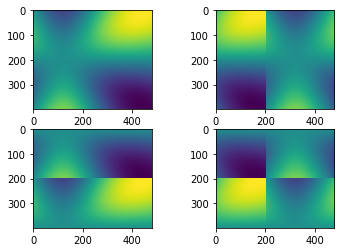

In [9]:
import numpy as np;from matplotlib import pyplot as plt
pt,pw=plt.subplot,plt.imshow
x,y=np.ogrid[-10:10:400j,-6:18:480j];r=np.sqrt(x**2+y**2);#x为单列数组
z=0.7*x*(x**2-3*y**2)*np.exp(-0.16*r);
zlr_r=np.roll(z,200,axis=1);zud_r=np.roll(z,200,axis=0);
zlrud_r=np.roll(z,(200,200),axis=(1,0))
pt(221);pw(z);
pt(222);pw(zlr_r);
pt(223);pw(zud_r);
pt(224);pw(zlrud_r);
plt.show()

# RGB彩色图像颜色滚动效果

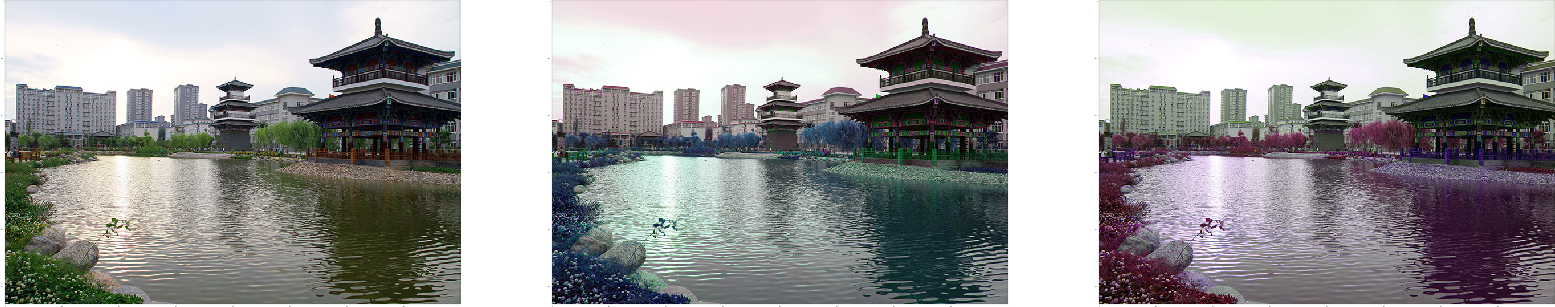

In [10]:
from matplotlib import pyplot as plt;
ar=plt.np
a=plt.imread('snut.jpg');#需要将图片文件nnx.jpg拷贝到python37 中
plt.figure(figsize=(200,150),dpi=10,facecolor=None,edgecolor='red')
tu=a,ar.roll(a,1,axis=2),ar.roll(a,2,axis=2)
for i in range(3):plt.subplot(1,3,i+1);plt.imshow(tu[i])
plt.show()

## 数组的行交换和列交换以及数组的旋转
利用交换数组的行索引和列索引实现交换数组的行或列。例如


In [11]:
import numpy as np;
a=np.arange(1,17).reshape(4,4).astype(np.int8);
r=[0,2,1,3];
print('  1<=>2行交换\n',a[r])  

  1<=>2行交换
 [[ 1  2  3  4]
 [ 9 10 11 12]
 [ 5  6  7  8]
 [13 14 15 16]]


二维数组轴交换np.swapaxes(a,0,1)等价于转置a.T。
二维数组还有顺时针旋转90度的操作np.rot90(a,-1)和逆时针旋转90度的操作np.rot90(a)。


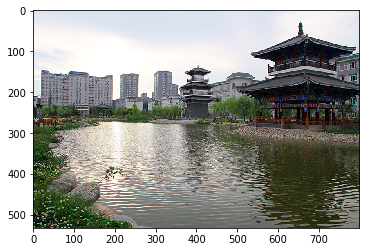

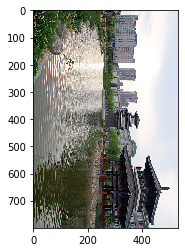

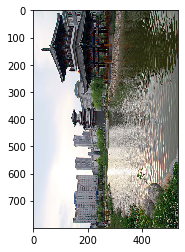

In [12]:
from matplotlib import pyplot as plt;
ar=plt.np
a=plt.imread('snut.jpg');#需要将图片文件nnx.jpg拷贝到python37 中
plt.imshow(a);
plt.show()
plt.imshow(ar.rot90(a,-1));
plt.show()#顺时针转90度
plt.imshow(ar.rot90(a));
plt.show()

## 数组元素级重复函数np.repeat()

In [13]:
import numpy as np;a=np.array([[1,2],[3,4]])
b=np.repeat(a,2,axis=0);print('b=',b)#每个元素沿axis=0轴重复2次
c=a.repeat(4,axis=1);print('c=',c)#每个元素沿axis=1轴重复4次
d=a.repeat([4,2,3,5]);print('d=',d) #指定每个元素的重复次数，并展平数组
e=a.repeat(6);print('e=',e)#每个元素重复相同次数，展平数组

b= [[1 2]
 [1 2]
 [3 4]
 [3 4]]
c= [[1 1 1 1 2 2 2 2]
 [3 3 3 3 4 4 4 4]]
d= [1 1 1 1 2 2 3 3 3 4 4 4 4 4]
e= [1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4]


## 数组尺寸扩展np.tile的应用

可用于设计器物表面图案或包装材质的花纹图案

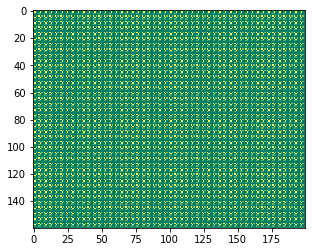

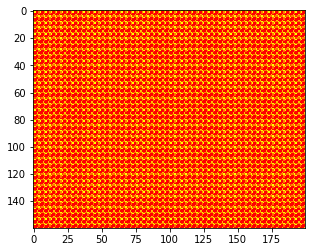

In [14]:
from matplotlib import pyplot as plt;ar=plt.np.array;at=plt.np.tile
a=ar([[200,0,100,0],[0,200,0,0],[80,40,0,0],[0,0,0,0]])
b=at(a,(40,50));
plt.imshow(b,cmap='summer');
plt.show()
a1=ar([[200,50,100,90],[100,200,0,0],[80,0,0,0],[0,0,0,150]]);
b1=at(a1,(40,50));
plt.imshow(b1,cmap='autumn');
plt.show()